# "Стримчик", план на 2017г.

**Цель проекта** - выявить драйверы популярности игр, чтобы работать с потенциально популярными продуктами и спланировать рекламные компании под них. 

#### План выполнения работы:
* Изучение имеющихся данных
* Приведение данных к нужным типам
* Нахождение и исправление ошибок, заполнение пропусков, добавление новых данных
* Подсчет, сколько игр выпускалось в разные годы
* Подсчет, как менялись продажи по платформам, вычисление средней продолжительности жизни платформы
* Выбор актуального периода данных
* Выбор актуальных платформ
* Подсчет каждой игры с разбивкой по платформам
* Подсчет влияние отзывов на игры на продажи
* Подсчет зависимость жанров на продажи
* Составление портретов игроков для каждого региона
* Подсчет влияние возрастного рейтинга на продажи
* Проверка гипотез
* Вывод по проекту и рекоммендации 

#### Импорт библиотек

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

#### Импорт и вывод исторических данных по играм

In [2]:
games = pd.read_csv('games.csv')
display(games)
print(games.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


#### Описание данных 

- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB

Открыли и посмотрели данные. Можно сразу заметить, что есть пропуски в столбцах **name , year_of_release, genre, critic_score, user_score, rating**
Так как данные были собраны из разных источников, то логично предположить, что пропуски при агрегации этих данных. Например значения в наименованиях игр могли пропасть из-за того, что в источнике была неправильная кодировка символов. Годы выпуска могли пропасть, просто потому что они не были внесены изначально в источник данных или игры настолько старые, что года не посчитали нужным заносить в базу. Рейтинги критиков и юзеров могли также находится в источниках, из которых было бы проблематично выгрузить все досканально. Рейтинг ESRB появился относительно недавно, а есть старые игры, для которых на момент ввода рейтинга эти данные просто не были расчитаны, да и не имелось в этом нужды, т.к. эти игры уже не выходили официально в магазинах.

## Подготовка данных

Приведём названия столбцов в нужный регистр, согласно ТЗ к проекту

In [3]:
games.columns = map(str.lower, games.columns)

- Строчки с пропущенным названием игры удалим. Их всего две и мы не можем никак адекватно их восстановить. 
- Пропущенные значения в годах выпуска заполним цифрой-маркером. Теоритически года можно заполнить по названию игры. Например для одной и той же игры год выпуска может быть прописан на одной платформе, а на другой его нет. Но не факт, что мы таким образом сможем восстановить все пропуски, а они в целом составляют 1,5% из датасета. Поэтому проще не проделывать такие манипуляции, на общие выводы они критически не повлияют.
- Изменили формат столбца с годами выпуска, т.к. там находятся целочисленные данные. 
- Изменили формат столбца с оценкой пользователя на float


**Про TBD**
TBD - это ситуация, когда игра не получила свой окончательный рейтинг ввиду того, что произвелось недостаточно оценочных данных для вынесения вердикта. Оснований для заполнения значений tbd у нас нет. Восстановить данную оценку качественно мы не можем, поэтому этого лучше вообще не делать. Можно было бы заполнить цифрой-маркером, как я это сделала с годами, но "0" присутствует в рейтинге, и в целом такая замена может исказить данные. 
Только 5,5% TBD приходится на последние 5 лет, а старые игры вряд ли помогут нам спланировать следующий год. 
Заменим TBD просто на NaN и будем в дальнейшем для анализа нарезать датасет с учётом отсутствующих значений.  


In [4]:
games = games.dropna(subset=['name']).reset_index()
games['year_of_release'] = games['year_of_release'].fillna(0)
games['year_of_release'] = games['year_of_release'].astype('int')
games['user_score'] = games['user_score'].replace('tbd',).astype('float')
games['rating'] = games['rating'].fillna('Not Defined')

print(games['rating'].value_counts())

Not Defined    6764
E              3990
T              2961
M              1563
E10+           1420
EC                8
K-A               3
RP                3
AO                1
Name: rating, dtype: int64


Постараемся заполнить рейтинг пользователей максимально разумным способом. Есть игры, которые выпускались на нескольких платформах. Игра в целом хороша, но у одной из платформ нет рейтинга на нее, но есть у другой. Мы скопировали рейтинг с платформы, где он есть туда, где его нет. Чаще всего, если игра хороша, то ее портируют на другие платформы без кардинальных изменений, а значит рейтинг сохранится примерно таким же. Остальные пропуски мы не сможем заполнить, так как у нас недостаточно данных. Теоретически мы могли бы скопировать в пропуски рейтинги критиков и наоборот, но тогда наши данные стали бы некорректными, ведь далее мы хотим посмотреть зависимость продаж от рейтингов критиков и юзеров отдельно

In [5]:
print('Пропусков в рейтинге пользователей до заполнения', games['user_score'].isna().sum())
pul = games.groupby('name').agg({'user_score':'mean'}).reset_index() #создаем таблицу, где группируем по игре, считаем средний рейтинг игры по всем платформам
pul = pul.rename(columns={'user_score': 'user'}) #переименовываем столбец, чтобы при воссоединении не дублились имена столбцов
games = games.merge(pul, on='name', how='left') # присоединяем столбец с рейтингами к играм
games['user_score'] = games['user_score'].fillna(games['user']) #копируем в пропуски значения рейтингов игр
games = games.drop(['user'], axis='columns') #удаляем лишний столбец, который нам уже не нужен
print('Пропусков в рейтинге пользователей после заполнения', games['user_score'].isna().sum())

Пропусков в рейтинге пользователей до заполнения 7953
Пропусков в рейтинге пользователей после заполнения 7048


Взглянем на то, сколько игр выпускалось в разные года и сколько за последнее время. 
А также на то, сколько уже прожили платформы и каково среднее время их жизни. 

In [6]:
games_year_of_release = games.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='name', ascending=False)
display(games_year_of_release.head(10))
display(games_year_of_release.sort_values(by='year_of_release', ascending=False).head(10))
games_year_mean = games.pivot_table(index='platform', values='year_of_release', aggfunc=pd.Series.nunique).sort_values(by='year_of_release', ascending=False)
print('Время жизни каждой платформы')
display(games_year_mean)
print('Среднее время жизни любой платформы: ', round(games_year_mean['year_of_release'].mean()), 'лет')

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


,name
year_of_release,
2016,502
2015,606
2014,581
2013,544
2012,653
2011,1136
2010,1255
2009,1426
2008,1427


Время жизни каждой платформы


,year_of_release
platform,
PC,27
GB,14
X360,13
PSP,13
PS2,13
NES,12
Wii,12
DS,12
PS3,12


Среднее время жизни любой платформы:  8 лет


Добавим суммарные продажи по всем регионам.

In [7]:
games['total_sales'] = games['other_sales']+games['jp_sales']+games['eu_sales']+games['na_sales']
games_plat = games.groupby('platform').agg({'total_sales':'sum'}).reset_index()
games_plat1 = games.groupby('platform').agg({'total_sales':'var'}).reset_index()
games_plat2 = games.groupby('platform').agg({'total_sales':'std'}).reset_index()
games_plat = games_plat.merge(games_plat1, on='platform', how='left').merge(games_plat2, on='platform', how='left').sort_values(by='total_sales', ascending=False)
games_plat = games_plat.rename(columns={'total_sales_x': 'total_sales', 'total_sales_y': 'dispersion', 'total_sales': 'std'}).reset_index()
display(games_plat)

,index,platform,total_sales,dispersion,std
0,5,GB,255.46,28.788352,5.365478
1,11,NES,251.05,26.091786,5.108012
2,26,Wii,907.51,9.775681,3.126609
3,23,SNES,200.04,3.494913,1.869469
4,28,X360,971.42,2.610403,1.615674
5,18,PS4,314.14,2.590350,1.609456
6,8,GEN,28.35,2.220223,1.490041
7,2,3DS,259.00,2.047406,1.430876
8,4,DS,806.12,2.034764,1.426451
9,17,PS3,939.65,1.936966,1.391749


Посмотрели продажи по платформам за все время. Очевидно, что нам нужно отсеить старые платформы, которые неактуальные. Возьмем данные от 2014г и выше, т.к. именно начиная с этого года индустрия игр шагнула вперед. Данные за 3 года - это тот самый период, который для нас максимально актуален. Период обновления платформ обычно составляет 3-5 лет в зависимости от платформы. Мы выберем 3 года, т.к. игровая индустрия - штука изменчивая, и нам нельзя прогадать, если будет смотреть на старые данные. Данных за 3 года нам должно хватить. Ниже мы проверим это на платформах.

,platform,total_sales,dispersion,std
0,PS4,288.15,2.608124,1.614969
1,XOne,140.36,1.095189,1.046513
2,3DS,86.68,1.412219,1.188368
3,PS3,68.18,0.400764,0.633059
4,X360,48.22,0.395599,0.628967
5,WiiU,42.98,1.349005,1.161467
6,PC,27.05,0.108477,0.329359
7,PSV,22.40,0.020048,0.141591
8,Wii,5.07,0.391189,0.625451
9,PSP,0.36,0.000769,0.027735


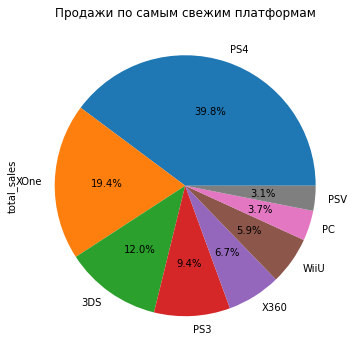

In [8]:
games_plat_sale = games.query('year_of_release >= 2014').groupby(['platform']).agg({'total_sales':'sum'}).reset_index().sort_values(by='total_sales', ascending=False)
games_plat3 = games.query('year_of_release >= 2014').groupby('platform').agg({'total_sales':'var'}).reset_index()
games_plat4 = games.query('year_of_release >= 2014').groupby('platform').agg({'total_sales':'std'}).reset_index()
games_plat_sale = games_plat_sale.merge(games_plat3, on='platform', how='left').merge(games_plat4, on='platform', how='left')
games_plat_sale = games_plat_sale.rename(columns={'total_sales_x': 'total_sales', 'total_sales_y': 'dispersion', 'total_sales': 'std'})
display(games_plat_sale.sort_values(by='total_sales', ascending=False))
games_plat_sale = games_plat_sale.head(8)
games_plat_sale.plot(x='platform', y='total_sales', kind = 'pie', labels = games_plat_sale['platform'], title = 'Продажи по самым свежим платформам', autopct='%1.1f%%', legend = False, grid=True, figsize=(7, 6))
plt.show()

Убедились, что взяли верный период, т.к. старые платформы, типа psp и wii уже давно изжили себя, продажи не идут в сравнение с такими мастадонтами, как платформы от Microsoft и Sony. У Нинтендо как раз вышла новая 3ds, наглядно видно, что компания поддерживает платформу играми, продажи на хорошем уровне. Очевидно, что начиная с продаж платформы WII , количество продаж начинает резко снижаться, поэтому мы возьмем в рассмотрение только первые 8

## Анализ данных

Оставим данные только по тем платформам и по тем годам, которые мы определили на предыдущих шагах

In [9]:
games_new = games.query('platform in @games_plat_sale.platform and year_of_release >= 2014')
display(games_new)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Not Defined,14.63
42,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Not Defined,11.68
77,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Not Defined,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16701,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Not Defined,0.01
16705,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Not Defined,0.01
16708,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Not Defined,0.01
16710,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Not Defined,0.01


platform,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne
year_of_release,,,,,,,,
2016,15.14,5.25,3.60,69.25,4.25,4.60,1.52,26.15
2015,27.78,8.52,16.82,118.90,6.25,16.35,11.96,60.14
2014,43.76,13.28,47.76,100.00,11.90,22.03,34.74,54.07


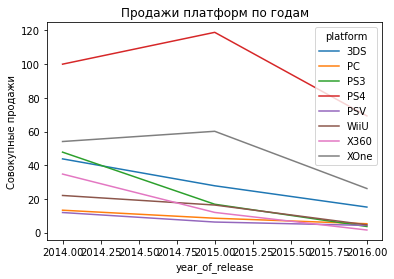

In [10]:
games_new1 = games_new.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=sum).sort_values(by='year_of_release', ascending=False)
display(games_new1)
games_new1.plot()
plt.title('Продажи платформ по годам')
plt.ylabel('Совокупные продажи')
plt.show()

Посмотрели продажи по популярным платформам. Очевидно PS (на тот период времени) собирает больше всего продаж. Далее идёт её извечный конкурент Microsoft со своими Xбоксами. И замыкает список также очень популярная платформа от Nitendo

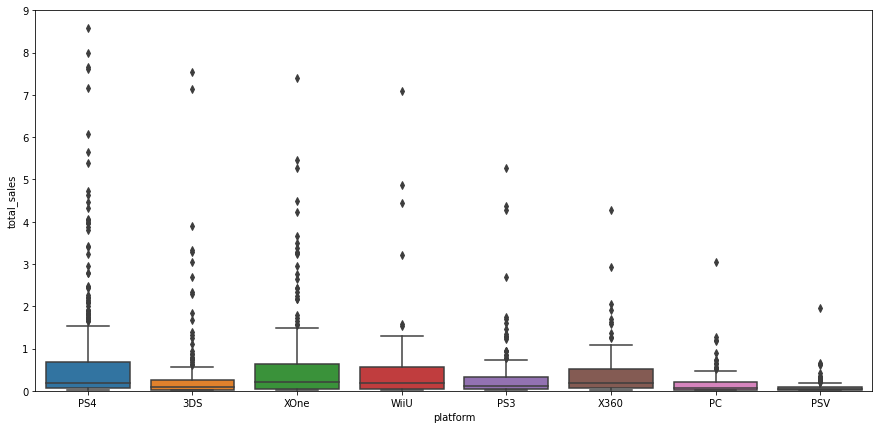

In [11]:
plt.figure(figsize = (15,7))
florr_plot = sns.boxplot(x='platform', y='total_sales', data=games_new)
florr_plot.set_ylim([0, 9])
plt.show()

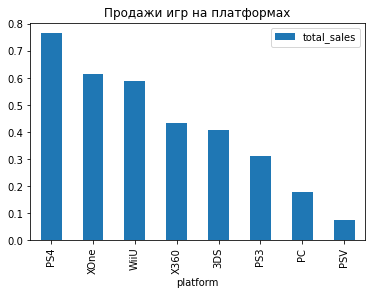

In [12]:
games_new.pivot_table(index='platform', values='total_sales', aggfunc='mean').sort_values(by='total_sales', ascending=False).plot(kind='bar')
plt.title('Продажи игр на платформах')
plt.show()

Игры на платформах PS4, XOne, WiiU хорошо продаются. Данные по сумме отличаются от средних, но не кардинально. Самые популярные платформы чётко видны на обоих графиках. Можно сделать предположение, что если игра популярна, то она будет иметь хорошие продажи на всех платформах.  

Продажи и отзывы внутри PS4
              critic_score  user_score  total_sales
critic_score      1.000000    0.541545     0.402661
user_score        0.541545    1.000000    -0.021536
total_sales       0.402661   -0.021536     1.000000


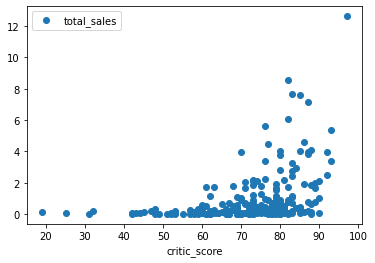

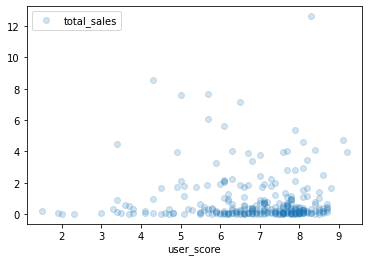

Продажи и отзывы внутри остальных платформ
              critic_score  user_score  total_sales
critic_score      1.000000    0.478958     0.309474
user_score        0.478958    1.000000    -0.021818
total_sales       0.309474   -0.021818     1.000000


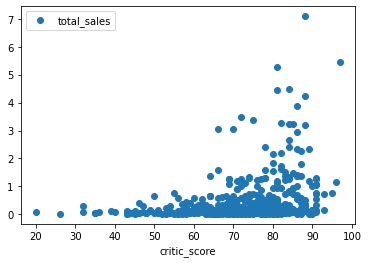

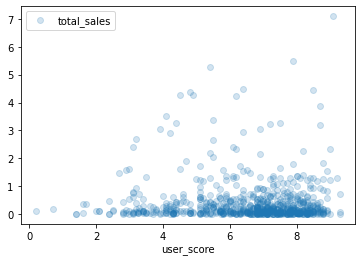

In [13]:
games_new_ps4_user = games_new.query('platform == "PS4"') #создадим таблицу с данными только по ps4
games_new_ps4_critic = games_new.query('platform == "PS4"')
games_new_other_user = games_new.query('platform != "PS4"') #создадим таблицу с данными кроме ps4
games_new_other_critic = games_new.query('platform != "PS4"')

print('Продажи и отзывы внутри PS4')
games_new_ps4_critic.sort_values(by='total_sales', ascending=True).plot(x='critic_score', y='total_sales', style='o', alpha=1, legend=True)
games_new_ps4_user.sort_values(by='total_sales', ascending=True).plot(x='user_score', y='total_sales', style='o', alpha=0.2, legend=True)
games_cor = games_new_ps4_critic[['critic_score', 'user_score', 'total_sales']].corr()
print(games_cor)
plt.show()

print('Продажи и отзывы внутри остальных платформ')
games_new_other_critic.sort_values(by='total_sales', ascending=True).plot(x='critic_score', y='total_sales', style='o', alpha=1, legend=True)
games_new_other_user.sort_values(by='total_sales', ascending=True).plot(x='user_score', y='total_sales', style='o', alpha=0.2, legend=True)
games_cor = games_new_other_critic[['critic_score', 'user_score', 'total_sales']].corr()
print(games_cor)
plt.show()

Графики рассеивания показывают нам, что чем больше рейтинг критиков у игры, тем больше будут у неё продажи. 
С рейтингом пользователей не всё так однозначно, потому что корреляция отрицательная. Это значит, что даже если у игры будет высокий рейтинг у пользователей, то не факт, что продажи повысятся. Возможно пользователи, которые проставили рейтинг игре, скачали её на торрентах, а не купили. 

Какие игровые жанры любят во всем мире


,genre,total_sales,dispersion,std
0,Action,197.97,0.647568,0.804716
1,Shooter,170.94,4.204827,2.050567
2,Sports,108.83,1.554087,1.246630
3,Role-Playing,101.44,1.385997,1.177284
4,Misc,34.39,0.536326,0.732342
5,Fighting,28.22,1.411471,1.188053
6,Racing,27.52,0.928749,0.963716
7,Platform,18.09,0.522095,0.722561
8,Adventure,17.32,0.042227,0.205492
9,Simulation,13.13,0.418511,0.646925


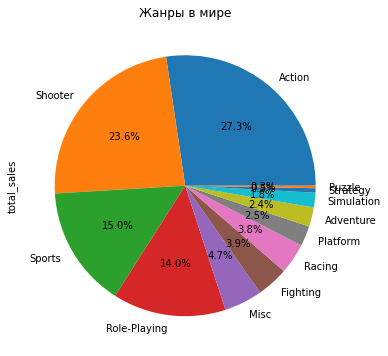

In [14]:
print('Какие игровые жанры любят во всем мире')
games_genre = games_new.groupby('genre').agg({'total_sales':'sum'}).reset_index().sort_values(by='total_sales', ascending=False)
games_genre1 = games_new.groupby('genre').agg({'total_sales':'var'}).reset_index()
games_genre2 = games_new.groupby('genre').agg({'total_sales':'std'}).reset_index()
games_genre = games_genre.merge(games_genre1, on='genre', how='left').merge(games_genre2, on='genre', how='left')
games_genre = games_genre.rename(columns={'total_sales_x': 'total_sales', 'total_sales_y': 'dispersion', 'total_sales': 'std'})
display(games_genre.sort_values(by='total_sales', ascending=False))

games_genre.plot(x='genre', y='total_sales', kind = 'pie', labels = games_genre['genre'], title = 'Жанры в мире', autopct='%1.1f%%', legend = False, grid=True, figsize=(7, 6))
plt.show()

Построили зависимость продаж от жанра игры. Поняли, что самые продаваемые - это Экшн, Стрелялки и Спорт. Примем это во внимание при формировании нашего итогового плана. 

## Cоставляем портрет пользователя каждого региона

Посмотрим какие жанры игр любят пользователи из разных регионов

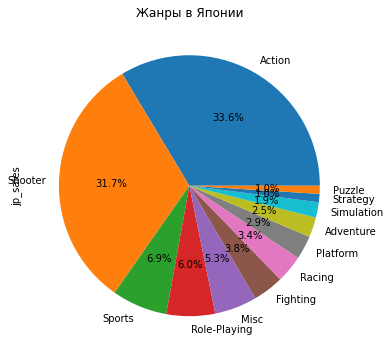

--------------------------------------------


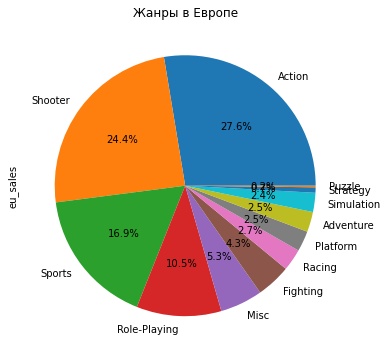

--------------------------------------------


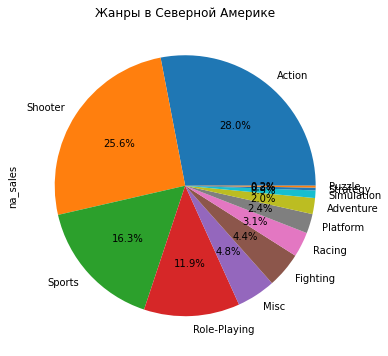

In [15]:
games_genre_jp = games_new.groupby('genre').agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False)
games_genre_jp.plot(x='genre', y='jp_sales', kind = 'pie', labels = games_genre['genre'], title = 'Жанры в Японии', autopct='%1.1f%%', legend = False, grid=True, figsize=(7, 6))
plt.show()
print('--------------------------------------------')

games_genre_eu = games_new.groupby('genre').agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False)
games_genre_eu.plot(x='genre', y='eu_sales', kind = 'pie', labels = games_genre['genre'], title = 'Жанры в Европе', autopct='%1.1f%%', legend = False, grid=True, figsize=(7, 6))
plt.show()
print('--------------------------------------------')

games_genre_na = games_new.groupby('genre').agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False)
games_genre_na.plot(x='genre', y='na_sales', kind = 'pie', labels = games_genre['genre'], title = 'Жанры в Северной Америке', autopct='%1.1f%%', legend = False, grid=True, figsize=(7, 6))
plt.show()

Построили сводные таблицы, где сгруппировали продажи по жанрам в зависимости от континента. 
Во всех странах картина примерно похожая:
* В Японии очень любят экшн и шутеры, спорт же имеет долю всего 7%. Ситуация со спортом вполне объяснима. Популярные спортивные игры по большей части связаны со спортивной культурой стран Европы и Америки (Fifa, NFL), поэтому они непонятны азиатской аудитории. 
* В Европе ситуация отличается тем, что процент вовлеченности в жанры спорт и ролевые игры сопоставима с первыми двумя жанрами - экшен и шутер. 
* В Северной Америке ситуация ничем не отличается от Европы

Также посмотрим какие консоли предпочитают пользователи из разных регионов

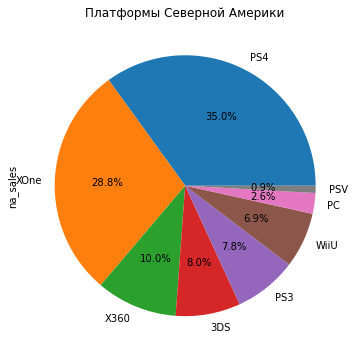

--------------------------------------------


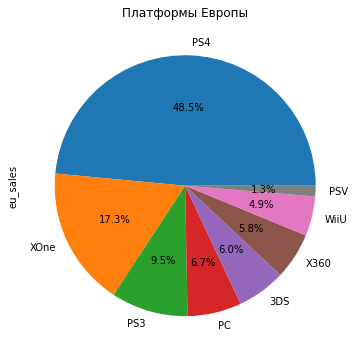

--------------------------------------------


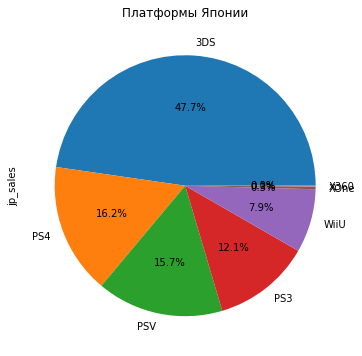

In [16]:
games_na = games_new.pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False)
games_na.plot(x='platform', y='na_sales', kind = 'pie', labels = games_na['platform'], title = 'Платформы Северной Америки', autopct='%1.1f%%', legend = False, grid=True, figsize=(7, 6))
plt.show()
print('--------------------------------------------')
games_eu = games_new.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False)
games_eu.plot(x='platform', y='eu_sales', kind = 'pie', labels = games_eu['platform'], title = 'Платформы Европы', autopct='%1.1f%%', legend = False, grid=True, figsize=(7, 6))
plt.show()
print('--------------------------------------------')
games_jp = games_new.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False)
games_jp.plot(x='platform', y='jp_sales', kind = 'pie', labels = games_jp['platform'], title = 'Платформы Японии', autopct='%1.1f%%', legend = False, grid=True, figsize=(7, 6))
plt.show()

* Америка - это та часть света, где есть местное производство своих платформ xbox, поэтому их божно более выгодно купить + много эксклюзивов для внутреннего рынка. Также не так далеко находится Япония, из которой идет много экспорта, в том числе платформ ps и nintendo. Это объясняет то, что xboxOne и PS4 ,как два мастодонта , почти наравне, старенькие ps3 и xbox360 аналогично, затем японские 3ds и wii
* В то время, как Америка сконцентрировалась на огромном внутреннем рынке, Япония тратит часть сил на экспорт, именно поэтому в наших реалиях и этих данных продажи\поддержка ps4 больше, чем у кого-либо. В Европе преобладает по количеству ps4, и только потом xboxOne. Так же сыграл на руку тот фактор, что ps4 вышла раньше своего конкурента, поэтому игр и комьюнити больше. В Европе нет своих игровых платформ (не берем в расчет PC), поэтому выбирают либо ps, либо xbox. И только после них уже PC, т.к. это хорошая альтернатива
* У Японии специфический внутренний рынок, люди в этой стране довольно патриотричны, поэтому выбирают народную продукцию, а именно 3ds, ps4, psv, ps3, wii

,rating,jp_sales,eu_sales,na_sales
2,M,8.01,93.44,96.42
3,Not Defined,56.54,58.79,64.70
0,E,8.94,57.64,50.59
4,T,14.78,34.07,38.95
1,E10+,4.46,24.15,31.32


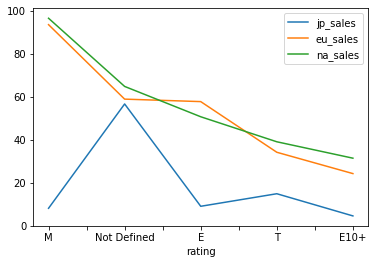

In [17]:
games_region = games_new.groupby('rating').agg({'jp_sales':'sum', 'eu_sales':'sum', 'na_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False)
display(games_region)
games_region.plot(x='rating', y=['jp_sales', 'eu_sales', 'na_sales'])
plt.show()

На графике видно, что для Европы и Америки характерно следующее: чем выше рейтинг игры, тем больше продажи. Это говорит о том, что больше всего в игры играют взрослые, либо близкие к этому возрасту подростки.
В Японии ситуация немного другая, четко видно, что активно играют именно подростки, т.е. средний возраст игрока гораздно младше, чем в Европе или Северной Америке

Для того, чтобы было наглядно видно продажи с пропуском рейтинга, я заполнила пустые значения для данного столбца маркером "Not Defined" - "Не Определён". Видим интересный результат. С учётом пропусков у нас получается, что большее количество продаж в Японии приходится на игры, рейтинг которых нам неизвестен. Да и в Америке с Европой на эту категорию приходится большое кол-во выручки. Причин этому может быть несколько:
1) Один из источников, из которого выгружали данные просто не имеет данных по рейтингу, поэтому у нас такой перекос в эту категорию
2) Изучив немного систему рейтинга ESRB, я поняла, что у нас почти нет в датасете игр, которые можно отнести к остальным рейтингам данной классификации - RP (Rating Pending), EC (Early childhood), AO (Adults Only). Похоже игры с отсутствующим рейтингом могут относится к этим категориям, а в источнике данных их не промаркировали.
3) Классификация по ESRB - не единственная классификация игр. В Японии в ходу сертификация CERO, а в Европе - PEGI. Возможно в наших источниках данных были проставлены рейтинги по CERO и PEGI, а не ERSB, поэтому данные и не подтянулись 

## Проверяем гипотезы о средних пользовательских рейтингах платформ и жанров. 

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевую гипотезу сформируем по такому типу - средние двух генеральных совокупностей для парных выборок равны между собой. Альтернативную гипотезу сформируем по типу противоположности, т.е. скорее всего, средние двух генеральных совокупностей для парных выборок неравны между собой.  
H0 - Cредние пользовательские рейтинги для Xbox One и PC одинаковые
H1 - Cредние пользовательские рейтинги для Xbox One и PC не одинаковые

In [18]:
games_isna = games_new[games_new['user_score'].isna() == False]
games_isna = games_isna.query('user_score < 999')
xbox_one = games_isna.query('platform == "XOne"')
xbox_one_user = xbox_one['user_score']
pc = games_isna.query('platform == "PC"')
pc_user = pc['user_score']
print('Дисперсия оценок x_one',np.var(xbox_one_user))
print('Дисперсия оценок pc',np.var(pc_user))
print('Разница дисперсий', (np.var(pc_user) - np.var(xbox_one_user)) / np.var(pc_user))


Дисперсия оценок x_one 1.813007431520062
Дисперсия оценок pc 2.863521505376344
Разница дисперсий 0.3668608990307604


In [19]:
alpha = 0.05
equal_var = False
results = st.ttest_ind(xbox_one_user, pc_user, equal_var = False)
print('P- значение', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем гипотезу от том, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые')
else:
    print('Не отвергаем гипотезу от том, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые')

P- значение 0.035970581721361625
Отвергаем гипотезу от том, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые


Проверим гипотезу о том, что средние пользовательские рейтинги игр жанров Action и Sport разные.

Нулевую гипотезу сформируем по такому типу - средние двух генеральных совокупностей для парных выборок равны между собой. Альтернативную гипотезу сформируем по типу противоположности, т.е. скорее всего, средние двух генеральных совокупностей для парных выборок неравны между собой.  
H0 - Cредние пользовательские рейтинги для игр жанров Action и Sport разные
H1 - Cредние пользовательские рейтинги для игр жанров Action и Sport не разные

In [20]:
action = games_isna.query('genre == "Action"')
score_action = action['user_score']
sport = games_isna.query('genre == "Sports"')
score_sport = sport['user_score']
print('Дисперсия оценок жанра action',np.var(score_action))
print('Дисперсия оценок жанра sports',np.var(score_sport))
print('Разница дисперсий',(np.var(score_sport) - np.var(score_action)) / np.var(score_sport))

Дисперсия оценок жанра action 1.9677708092691726
Дисперсия оценок жанра sports 3.473943966601276
Разница дисперсий 0.43356288178869623


In [21]:
alpha = 0.05
equal_var = False
results = st.ttest_ind(score_action, score_sport,  equal_var = False)
print('P- значение', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем гипотезу от том, что cредние пользовательские рейтинги игр жанров Action и Sport разные')
else:
    print('Не отвергаем гипотезу от том, что cредние пользовательские рейтинги жанров Action и Sport не разные', )

P- значение 2.3406739304124057e-16
Отвергаем гипотезу от том, что cредние пользовательские рейтинги игр жанров Action и Sport разные


# Вывод

Проанализировав исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы мы пришли к следующим выводам:

* Самые популярные платформы на момент 2016 г. - это флагманы от Sony, Microsoft и Nintendo, а именно PS4, Xbox One и 3DS. 
* Cреднее время жизни платформы - 8 лет (P.S. PS4 была выпущена в 2013 году. Глядя на выпуск пятой соньки как раз через примерно этот период сейчас в 2020 - веришь этой цифре)
* Игры на платформах PS4, XboxOne, Wii хорошо продаются. Из этого можно сделать вывод, что если игра хорошая, то она будет продаваться на всех платформах. 
* Чем больше рейтинг критиков у игры - тем лучше она будет продаваться, а вот на зрительские симпатии при планировании продаж лучше не полагаться. 
* Топ-5 любимых жанров игр у пользователей - Action, Shooter, Sports, Role Playing и Misc, с большим перекосом в пользу первых двух. Это в целом можно объяснить и тем, что продакшн хорошего экшена или шутера стоит гораздо дороже, чем какой-нибудь puzzle игры. 
* Популярные платформы в Америке - PS4 и Xbox One, Европы - аналогично, а вот Японцы патриотичны и покупают либо продукцию от Nintendo (3DS) или Sony (PSки)
* В Европе и Америке большинство продаж приходится на игры с рейтингом повыше, а вот в Японии популярны игры рейтинга для подростков. Не удивительно - В Японии продажа игр рейтинга Z (Mature-Adult в классификации ESRB) контролируется государством. 
* Средние пользовательские рейтинги для двух самых популярных платформ не одинаковые.
* Средние пользовательские рейтинги двух популярных жанров (Action и Sport) наоборот не разные. 

### План на 2017 г.:

* Для Японии будем делать ставки на платформы 3ds, ps4, psv (ps3 и wii морально устарели). Жанры игр возьмем Action и Shooter с рейтингами E и Т

In [22]:
plat_jp = ['PS4', '3DS', 'PSV']
genre_jp = ['Action', 'Shooter']
rating_jp = ['E', 'T']
jp_end = games_new.query('rating in @rating_jp and platform in @plat_jp and genre in @genre_jp').sort_values(by='jp_sales', ascending=False).head(20).reset_index()
print('Список игр:')
print(jp_end['name'])

Список игр:
0                      Kirby: Planet Robobot
1                     God Eater Resurrection
2                 Uncharted 4: A Thief's End
3      The Legend of Zelda: Tri Force Heroes
4                            Toukiden Kiwami
5                                    Destiny
6                                  Overwatch
7               One Piece: Pirate Warriors 3
8                         Samurai Warriors 4
9              Fate/Extella: The Umbral Star
10              One Piece: Pirate Warriors 3
11             Fate/Extella: The Umbral Star
12                  Dragon Ball: Xenoverse 2
13                        Disney Art Academy
14                    God Eater Resurrection
15             Samurai Warriors Chronicles 3
16    Uncharted: The Nathan Drake Collection
17                      inFAMOUS: Second Son
18                     Samurai Warriors 4-II
19                        Samurai Warriors 4
Name: name, dtype: object


* Для Северной Америки будем делать ставки на платформы ps4, xboxOne (xbox360- это предшественние xboxOne, так что не размуно ставить на них обоих, тем более, что 360 морально устарел). Жанры игр возьмем Action, Shooter, Sport и Ролевые с рейтингами М и Е

In [23]:
plat_na = ['PS4', 'Xone']
genre_na = ['Action', 'Shooter', 'Sports', 'Role-Playing']
rating_na = ['E', 'M']
jp_end = games_new.query('rating in @rating_na and platform in @plat_na and genre in @genre_na').sort_values(by='jp_sales', ascending=False).head(20).reset_index()
print('Список игр:')
print(jp_end['name'])

Список игр:
0     Metal Gear Solid V: The Phantom Pain
1                       Grand Theft Auto V
2                           Dark Souls III
3                               Bloodborne
4                                Fallout 4
5                 The Witcher 3: Wild Hunt
6                            Battlefield 1
7        Metal Gear Solid V: Ground Zeroes
8           Call of Duty: Infinite Warfare
9                Tom Clancy's The Division
10         Tom Clancy's Rainbow Six: Siege
11          Call of Duty: Advanced Warfare
12                   Battlefield: Hardline
13               Pro Evolution Soccer 2016
14                             Dying Light
15               Pro Evolution Soccer 2015
16                              Watch Dogs
17               Pro Evolution Soccer 2017
18                         The Evil Within
19            Resident Evil: Revelations 2
Name: name, dtype: object


* Для Европы будем делать ставки на 2 самых актуальных конкурентов ps4 и xboxOne и альтернативу им PC. Жанры игр возьмем Action, Shooter, Sport и Ролевые с рейтингами М и Е

In [24]:
plat_eu = ['PS4', 'Xone', 'PC']
genre_eu = ['Action', 'Shooter', 'Sports', 'Role-Playing']
rating_eu = ['E', 'M']
jp_end = games_new.query('rating in @rating_eu and platform in @plat_eu and genre in @genre_eu').sort_values(by='jp_sales', ascending=False).head(20).reset_index()
print('Список игр:')
print(jp_end['name'])

Список игр:
0     Metal Gear Solid V: The Phantom Pain
1                       Grand Theft Auto V
2                           Dark Souls III
3                               Bloodborne
4                                Fallout 4
5                 The Witcher 3: Wild Hunt
6                            Battlefield 1
7        Metal Gear Solid V: Ground Zeroes
8           Call of Duty: Infinite Warfare
9                Tom Clancy's The Division
10                   Battlefield: Hardline
11          Call of Duty: Advanced Warfare
12         Tom Clancy's Rainbow Six: Siege
13               Pro Evolution Soccer 2016
14                             Dying Light
15                              Watch Dogs
16                         The Evil Within
17               Pro Evolution Soccer 2017
18               Pro Evolution Soccer 2015
19                   Batman: Arkham Knight
Name: name, dtype: object
